# HEALSparse Tutorial for LSST

In sky surveys, we often want to characterize the different properties of our survey such as the limiting magnitudes for 5-sigma detections, the average seeing conditions for exposures, or just simply the coverage in different bands! If we want to do this for an ENTIRE sky survey (especially one as big as LSST!), we're going to need to be smart about how we do it! Enter: HEALSparse!

HEALsparse builds off the idea of a HEALpix map, which stands for **H**ierarchical **E**qual **A**rea iso**L**atitude **Pix**elization. More can be found [here](https://healpix.sourceforge.io/). Essentially, you're able to take a 1-dimensional array and project it onto the entire sky following their algorithm. It was developed for analysis of the CMB, but lots of the cool and quirky cosmologist and survey science folks love to use it!

HEALsparse implements sparse matiricies to make high resolution HEALpix maps of sky surveys quickly and efficiently. Since large portions of the sky often have the same value, its easier to instead create a low-resoltuion HEALpix map, and if there is coverage in one of these low-resolution pixels, we can store a high-resolution map in the low-resolution pixel. This might sound confusing and if it does that's okay because it does still lowkey feel like magic to me, but it works and that's all a gal can ask for! 

Anyways, here's a tutorial for folks since one could imagine that this won't be the last time this question comes up!

In [ ]:
# let's import our necessary packages
# some of the ones that are a bit niche here are:
# HEALsparse - https://healsparse.readthedocs.io/en/stable/
# skyproj - https://skyproj.readthedocs.io/en/latest/index.html

import healsparse as hsp
import healpy as hp
import numpy as np
import skyproj as sp
import matplotlib.pyplot as plt

In [2]:
# let's import our healsparse maps for the g and r band
# maps can be accessed here:
# https://drive.google.com/drive/folders/1mlEVdzO_h4oB9PValqm8Qz2sYQakFk0v
y10_g_cov = hsp.HealSparseMap.read('baseline_4.3.1_yr10_g_band_nside_128.hsp')
y10_r_cov = hsp.HealSparseMap.read('baseline_4.3.1_yr10_r_band_nside_128.hsp')

In [3]:
# let's load in our targets! for this example, we'll use some of Elisabeth's targets
# NAME ====== R.A ======== Dec
targets = {'NGC 2243': [97.3916550 ,-31.2833333],
           'Melotte 66': [111.5958300,-47.6666667],
           'Ruprecht 147': [289.1750000, -16.2833333],
           'NGC 2204': [93.8820833,-18.6700000],
           'Mamajek 4': [276.5460000,-50.9501000]}

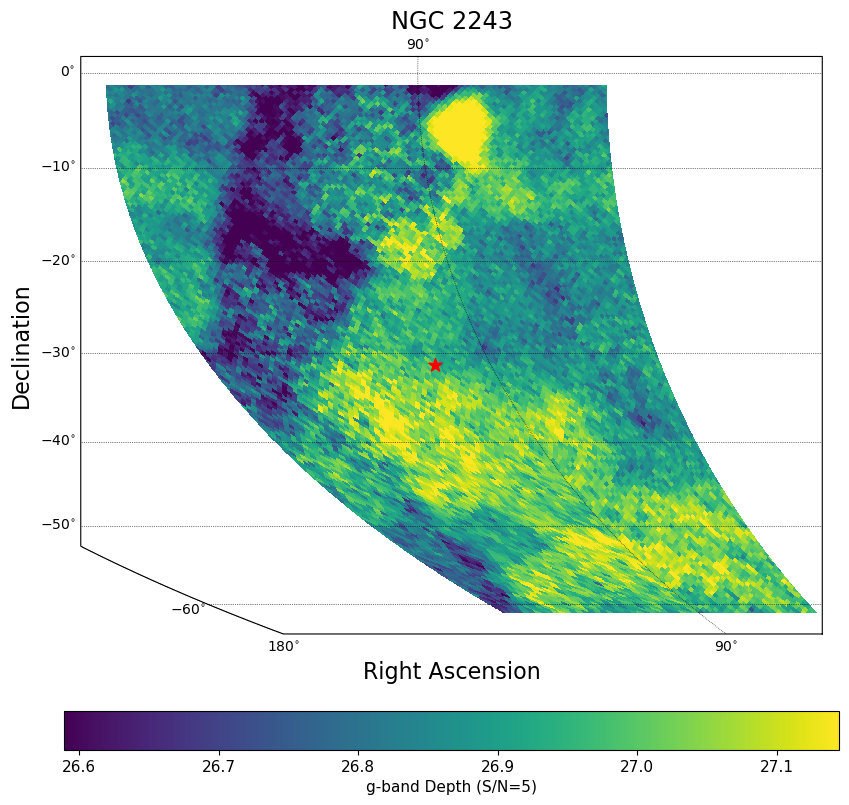

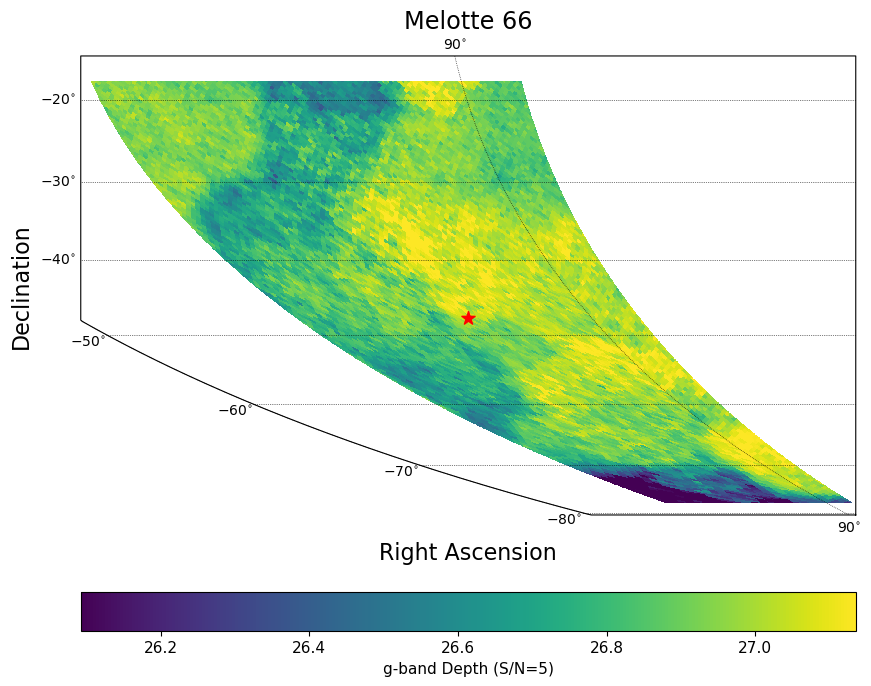

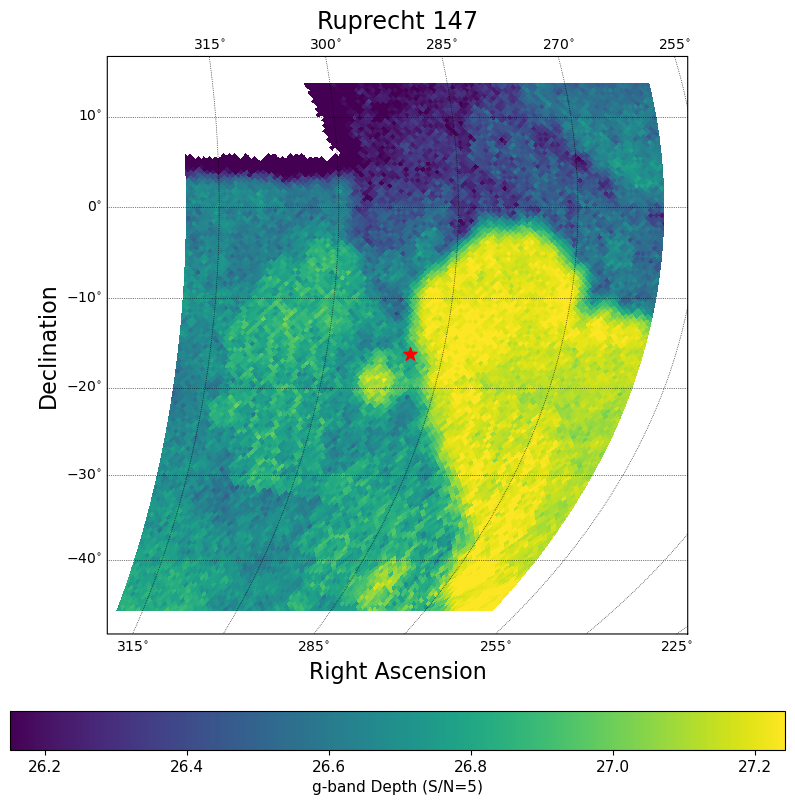

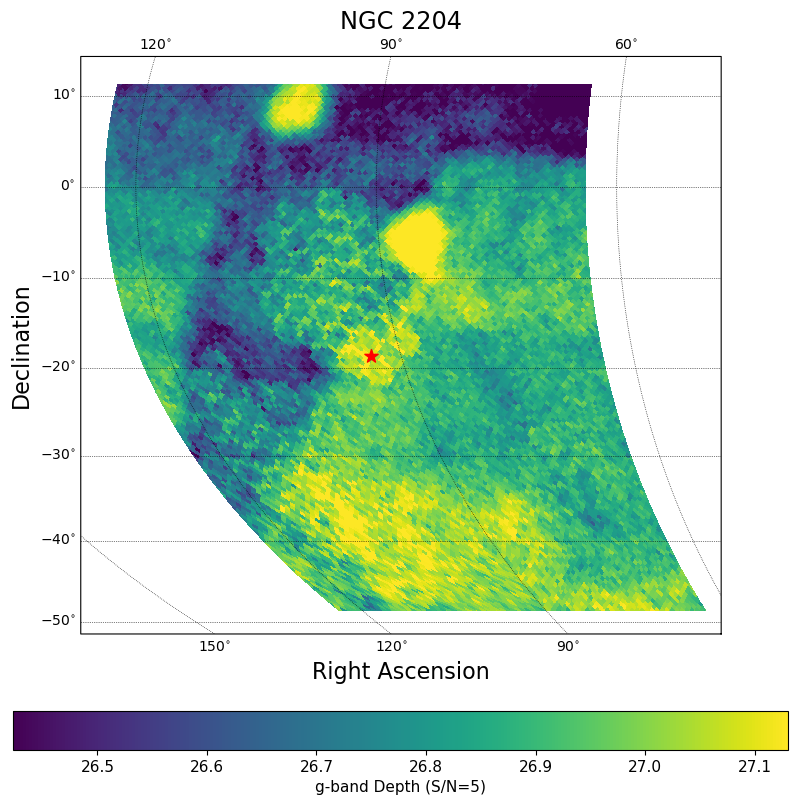

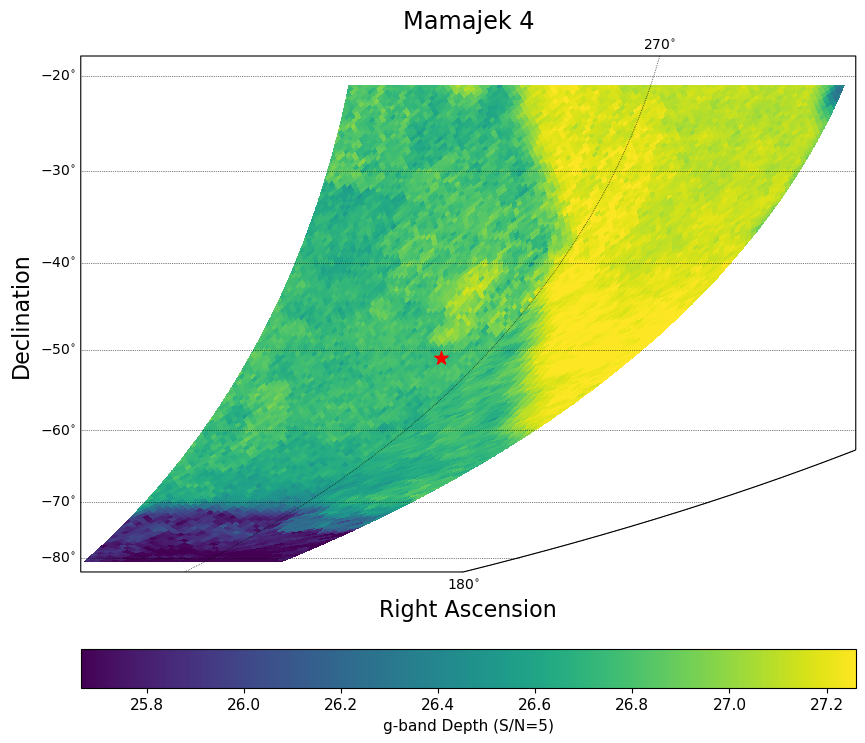

In [4]:
# now let's check what our g-band coverage looks like for each target
for target in list(targets.keys()):
    # read in RA and Dec
    ra = targets[target][0]
    dec = targets[target][1]

    # make a matplotlib fig and ax
    fig,ax = plt.subplots(1,1,figsize=(10,10))

    # let's make a McBryde sky projection
    sky = sp.McBrydeSkyproj(ax=ax)

    # we'll draw the healsparse map and focus on a 60 degree X 60 degree box
    sky.draw_hspmap(y10_g_cov,lon_range=[ra+30,ra-30],
                        lat_range=[dec+30,dec-30])
    
    # we'll add our marker too
    sky.scatter(ra,dec,s=100,color='r',marker='*')

    # add a lovely little colorbar on the bottom
    sky.draw_colorbar(label='g-band Depth (S/N=5)',
                      location='bottom',
                      pad = 0.1)
    
    sky.ax.set_title(target,pad=20,fontsize='xx-large')
    # output our plot!
    plt.show()


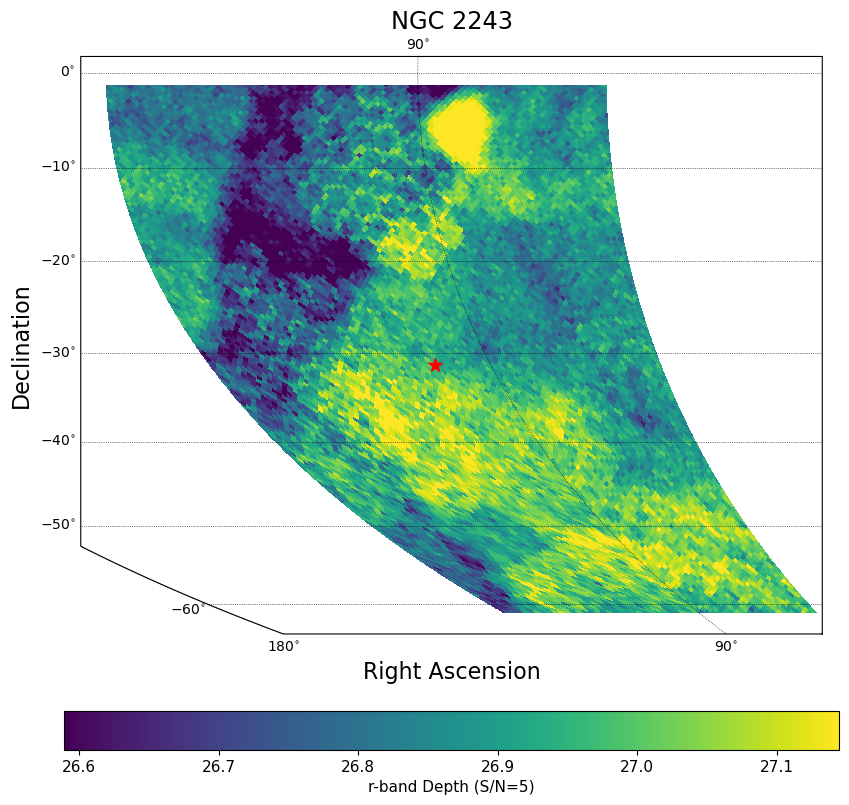

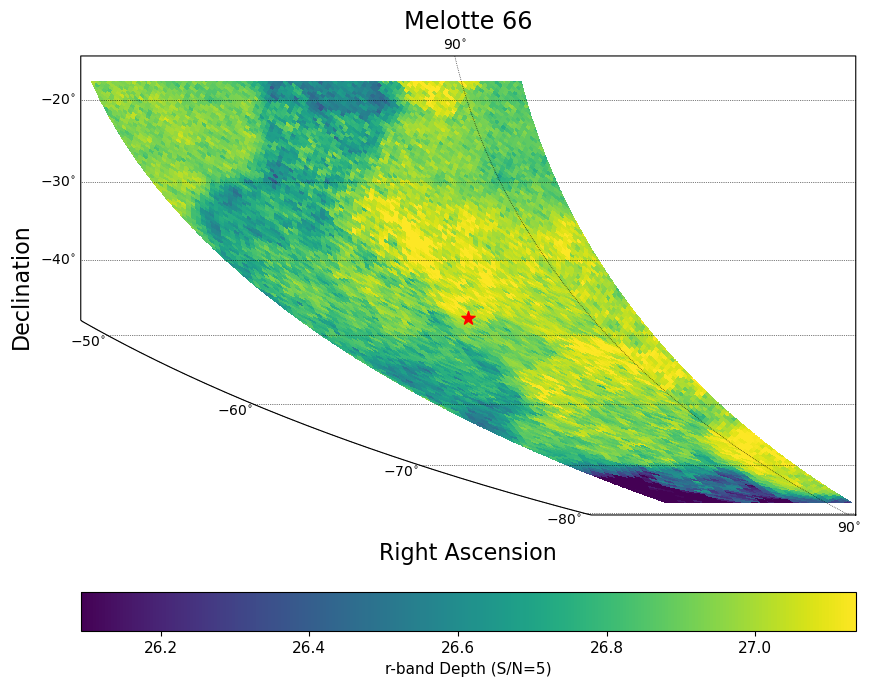

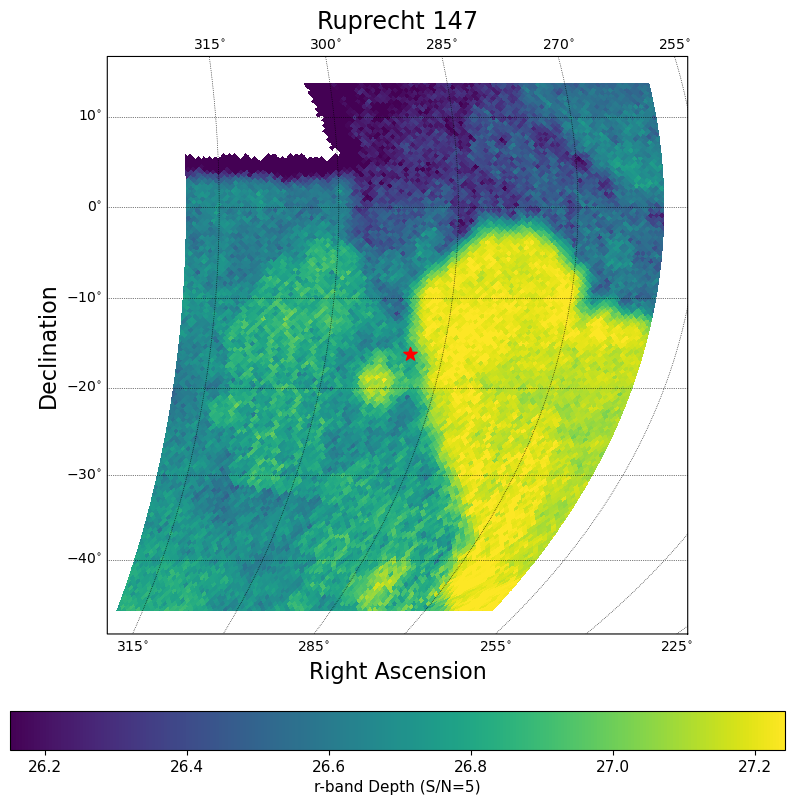

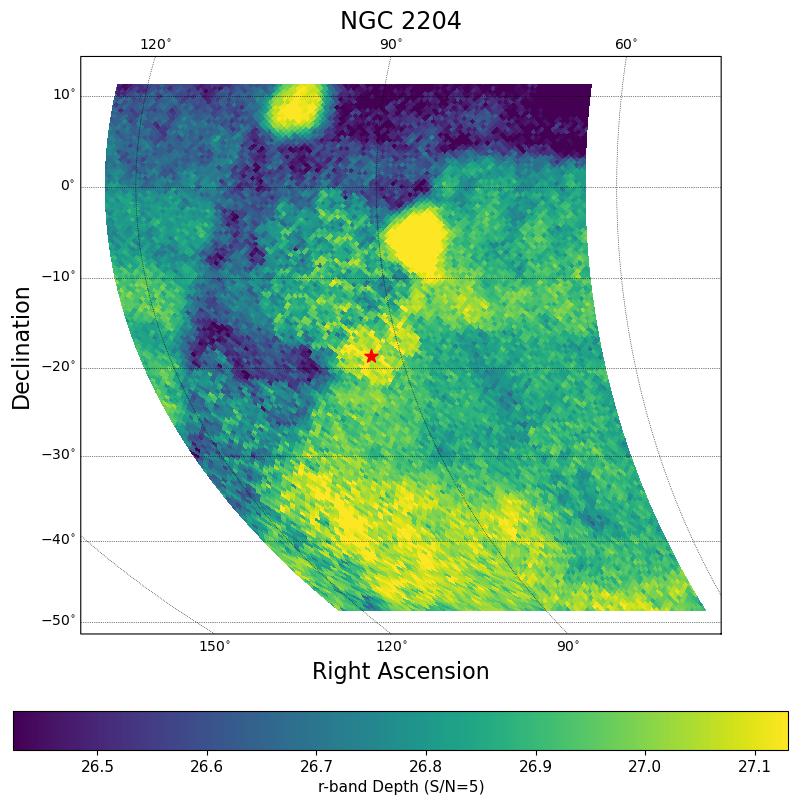

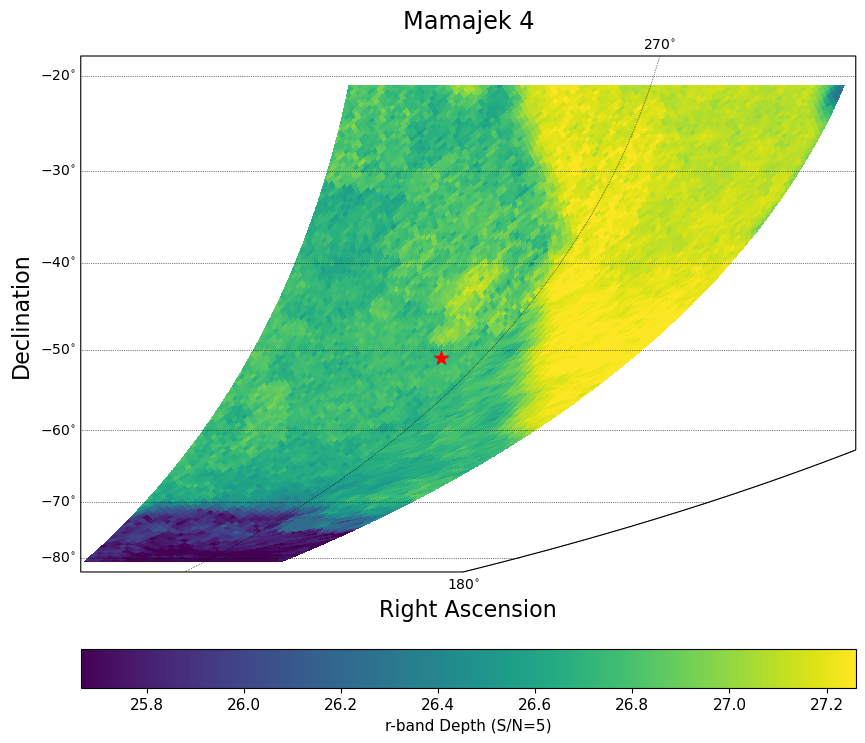

In [5]:
# now let's do the same for r-band!
for target in list(targets.keys()):
    # read in RA and Dec
    ra = targets[target][0]
    dec = targets[target][1]

    # make a matplotlib fig and ax
    fig,ax = plt.subplots(1,1,figsize=(10,10))

    # let's make a McBryde sky projection
    sky = sp.McBrydeSkyproj(ax=ax)

    # we'll draw the healsparse map and focus on a 60 degree X 60 degree box
    sky.draw_hspmap(y10_g_cov,lon_range=[ra+30,ra-30],
                        lat_range=[dec+30,dec-30])
    
    # we'll add our marker too
    sky.scatter(ra,dec,s=100,color='r',marker='*')

    # add a lovely little colorbar on the bottom
    sky.draw_colorbar(label='r-band Depth (S/N=5)',
                      location='bottom',
                      pad = 0.1)
    
    sky.ax.set_title(target,pad=20,fontsize='xx-large')
    # output our plot!
    plt.show()
